In [1]:
import matplotlib.pyplot as plt
import sarracen as src
import numpy as np

/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/cubic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/quartic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/

In [2]:
dm = 2/1000
hfact = 1.2

In [3]:
sdf_ini = src.read_csv('../Data/initial_distribution/toy_star.csv')
sdf_ini.params={'mass':dm, 'hfact':hfact}
sdf_ini.calc_density()
sdf_ini

,x,y,z,vx,vy,vz,h,u,rho
0,-0.545853,-0.358428,0.060610,0,0,0,0.005044,0,26922.872621
1,-0.019900,-0.089172,0.128558,0,0,0,0.005044,0,26922.872621
2,-0.028214,0.081889,-0.688266,0,0,0,0.005044,0,26922.872621
3,-0.300558,0.026892,-0.472094,0,0,0,0.005044,0,26922.872621
4,0.038164,-0.557702,-0.009428,0,0,0,0.005044,0,26922.872621
...,...,...,...,...,...,...,...,...,...
995,0.208194,-0.060404,-0.240565,0,0,0,0.005044,0,26922.872621
996,0.639992,-0.239642,0.238841,0,0,0,0.005044,0,26922.872621
997,-0.125684,-0.133795,0.635685,0,0,0,0.005044,0,26922.872621
998,-0.313519,-0.439521,0.408774,0,0,0,0.005044,0,26922.872621


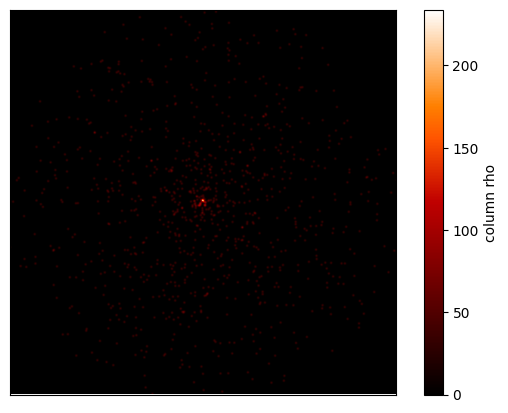

In [4]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sdf_ini.render('rho', ax=ax, rotation=[0,0,0])

In [5]:
sdf = src.read_csv('../Data/results/toy_star/final.csv')
sdf.params={'mass':dm, 'hfact':hfact}
sdf.calc_density()
sdf

,x,y,z,vx,vy,vz,h,u,rho
0,-0.253181,-0.176512,0.007029,0.000485,-0.000525,0.000089,0.078685,3.634086,7.094046
1,-0.035815,-0.035973,0.054899,0.000307,0.000294,-0.000287,0.055033,3.634274,20.734653
2,-0.077768,0.163938,-0.249909,0.001089,-0.000705,-0.000791,0.078806,3.634124,7.061478
3,-0.122218,0.027058,-0.148327,0.000362,-0.000585,-0.000244,0.060290,3.634071,15.770311
4,-0.010045,-0.239781,-0.055342,-0.000582,-0.000177,0.000036,0.065810,3.634161,12.125238
...,...,...,...,...,...,...,...,...,...
995,0.066268,-0.049568,-0.028248,-0.000260,0.000277,0.000118,0.055302,3.634477,20.434362
996,0.296759,-0.077643,0.030451,-0.000275,-0.000744,0.000654,0.078542,3.634486,7.132817
997,-0.046215,-0.114757,0.286647,0.000087,-0.000162,-0.000009,0.079987,3.634265,6.753324
998,-0.185890,-0.205412,0.143083,-0.000172,-0.000180,-0.000445,0.079863,3.634181,6.784727


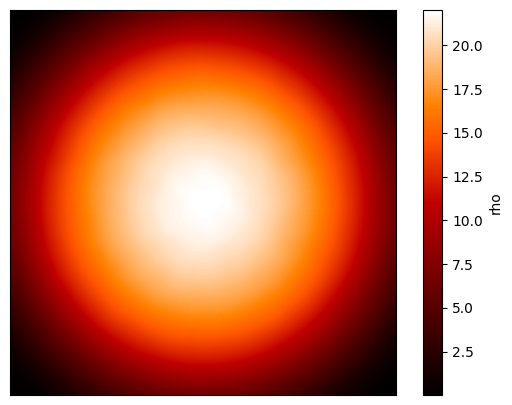

In [6]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sdf.render('rho', xsec=0., ax=ax, rotation=[0,0,0])

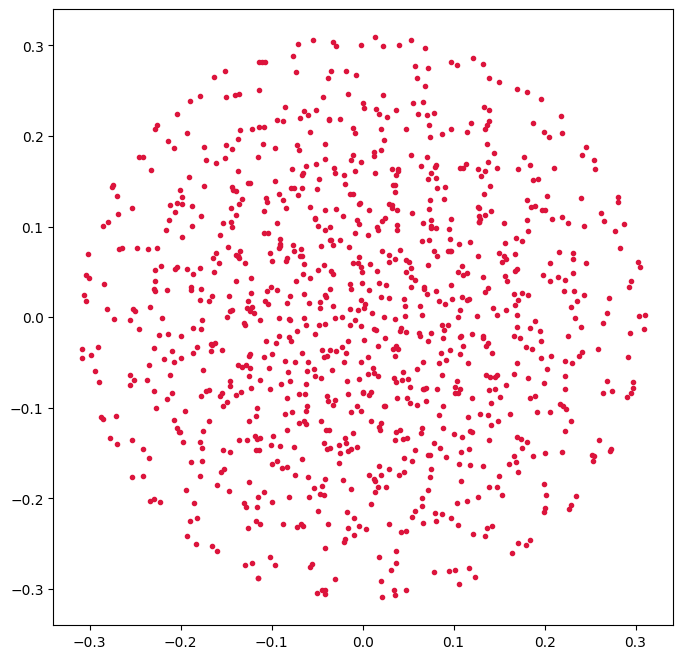

In [7]:
fig = plt.figure(figsize=(8,8))
plt.plot(sdf['x'], sdf['y'], '.', color='crimson')
plt.show()

# Density Distribution

In [8]:
def density_theo(r, R, lmbda, k):
    return lmbda/(4*k)*(R**2-r**2)

In [9]:
R = 0.75
k = 0.05
M = 2.0
n = 1.0
gamma = 2.0
#lmbda = 2*k / (np.pi**(1/n)) * (M*(1+n)/R**2)**(1+1/n)/M
lmbda = 2.*k*(gamma/(gamma-1.))/np.pi**(-1.5*(gamma-1.)) * (3.32335 * M/(R*R*R))**(gamma-1.)/(R*R);

In [10]:
r = np.linspace(0.001, 1.1*R, 100)
dens = density_theo(r, R, lmbda, k)

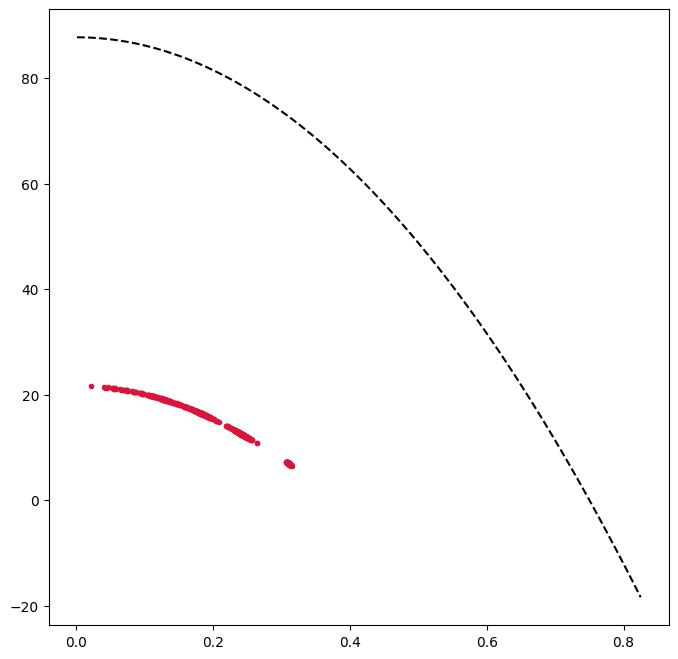

In [11]:
fig = plt.figure(figsize=(8,8))
plt.plot(np.sqrt(sdf['x']**2+sdf['y']**2+sdf['z']**2), sdf['rho'], '.', color='crimson')
plt.plot(r, dens, '--', color='k')
plt.show()